In [1]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Philippa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Philippa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Philippa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Philippa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Philippa\AppData\Roaming

True

In [41]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

df = pd.read_csv(r"C:\Users\Philippa\Documents\GitHub\webscraper\Scraper\NL_Parsed_Reviews.csv")

df_NL = df.copy()
df_NL

,name,date,rating,review
0,Ughduty,"Jun 19, 2025",7,Never played the game. Metacritic assigned my ...
1,tarquinthegreat,"Apr 28, 2025",10,absolutely banging ‎xxxxxxxxxxxxxxxxxxxxxxxxxx...
2,Gamewing,"Apr 21, 2025",6,"First couple hours are fun, getting your first..."
3,Z4ry,"Mar 24, 2025",9,100+ hours\n- Great evolution from previous ti...
4,Lucaq,"Mar 20, 2025",10,Perfect in every way.\nAaaaaaaaaaaaaaaaaaaaaaa...
...,...,...,...,...
209,Autosaver,"Jun 9, 2013",10,Animal Crossing has gone a long way since the ...
210,KirkyDaTurkey,"Jun 9, 2013",9,"Based on Day 1, this game is definitely a 9 so..."
211,EFYevan,"Jun 9, 2013",10,Much different than the previous DS version I...
212,L0stR3negade,"Jun 9, 2013",9,Refreshing style of game to play. Its hard to ...


## Basic Sentiment Analysis

In [3]:
# remove date and name as they aren't relevant for sentiment analysis
df_NL = df_NL.drop(columns=["name","date"])
df_NL

,rating,review
0,7,Never played the game. Metacritic assigned my ...
1,10,absolutely banging ‎xxxxxxxxxxxxxxxxxxxxxxxxxx...
2,6,"First couple hours are fun, getting your first..."
3,9,100+ hours\n- Great evolution from previous ti...
4,10,Perfect in every way.\nAaaaaaaaaaaaaaaaaaaaaaa...
...,...,...
209,10,Animal Crossing has gone a long way since the ...
210,9,"Based on Day 1, this game is definitely a 9 so..."
211,10,Much different than the previous DS version I...
212,9,Refreshing style of game to play. Its hard to ...


In [4]:
df_NL.isnull().sum()

rating    0
review    0
dtype: int64

In [5]:
df_NL["rating"].value_counts()

rating
10    99
9     67
8     23
7      7
6      5
5      5
4      3
0      2
1      2
2      1
Name: count, dtype: int64

In [6]:
sia = SentimentIntensityAnalyzer()
df_NL["scores"] = df["review"].apply(lambda review:sia.polarity_scores(review))

df_NL.head()

,rating,review,scores
0,7,Never played the game. Metacritic assigned my ...,"{'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'comp..."
1,10,absolutely banging ‎xxxxxxxxxxxxxxxxxxxxxxxxxx...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,6,"First couple hours are fun, getting your first...","{'neg': 0.101, 'neu': 0.734, 'pos': 0.166, 'co..."
3,9,100+ hours\n- Great evolution from previous ti...,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp..."
4,10,Perfect in every way.\nAaaaaaaaaaaaaaaaaaaaaaa...,"{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'comp..."


In [7]:
# compound the value to compare
df_NL["compound"] = df_NL["scores"].apply(lambda score_dict: score_dict["compound"])
df_NL.head()

,rating,review,scores,compound
0,7,Never played the game. Metacritic assigned my ...,"{'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'comp...",-0.2584
1,10,absolutely banging ‎xxxxxxxxxxxxxxxxxxxxxxxxxx...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,6,"First couple hours are fun, getting your first...","{'neg': 0.101, 'neu': 0.734, 'pos': 0.166, 'co...",0.7303
3,9,100+ hours\n- Great evolution from previous ti...,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...",0.8720
4,10,Perfect in every way.\nAaaaaaaaaaaaaaaaaaaaaaa...,"{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'comp...",0.5719


In [8]:
# extrapolate the overall sentiment (if compound > 0 then positive, otherwise neg)
df_NL["sentiment"] = df_NL["compound"].apply(lambda c:"pos" if c>=0 else "neg")
df_NL.head()

,rating,review,scores,compound,sentiment
0,7,Never played the game. Metacritic assigned my ...,"{'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'comp...",-0.2584,neg
1,10,absolutely banging ‎xxxxxxxxxxxxxxxxxxxxxxxxxx...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,6,"First couple hours are fun, getting your first...","{'neg': 0.101, 'neu': 0.734, 'pos': 0.166, 'co...",0.7303,pos
3,9,100+ hours\n- Great evolution from previous ti...,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...",0.8720,pos
4,10,Perfect in every way.\nAaaaaaaaaaaaaaaaaaaaaaa...,"{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'comp...",0.5719,pos


In [9]:
# convert ratings to pos or neg for accuracy metrics
df_NL["rating"] = df_NL["rating"].replace(to_replace=(0, 1, 2, 3, 4, 5), value="neg")
df_NL["rating"] = df_NL["rating"].replace(to_replace=(6, 7, 8, 9, 10), value="pos")

df_NL

,rating,review,scores,compound,sentiment
0,pos,Never played the game. Metacritic assigned my ...,"{'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'comp...",-0.2584,neg
1,pos,absolutely banging ‎xxxxxxxxxxxxxxxxxxxxxxxxxx...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,pos,"First couple hours are fun, getting your first...","{'neg': 0.101, 'neu': 0.734, 'pos': 0.166, 'co...",0.7303,pos
3,pos,100+ hours\n- Great evolution from previous ti...,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...",0.8720,pos
4,pos,Perfect in every way.\nAaaaaaaaaaaaaaaaaaaaaaa...,"{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'comp...",0.5719,pos
...,...,...,...,...,...
209,pos,Animal Crossing has gone a long way since the ...,"{'neg': 0.079, 'neu': 0.76, 'pos': 0.161, 'com...",0.6908,pos
210,pos,"Based on Day 1, this game is definitely a 9 so...","{'neg': 0.04, 'neu': 0.843, 'pos': 0.117, 'com...",0.9141,pos
211,pos,Much different than the previous DS version I...,"{'neg': 0.034, 'neu': 0.848, 'pos': 0.118, 'co...",0.7850,pos
212,pos,Refreshing style of game to play. Its hard to ...,"{'neg': 0.134, 'neu': 0.613, 'pos': 0.253, 'co...",0.5789,pos


In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(df_NL["rating"], df_NL["sentiment"])

0.9158878504672897

As a very simple sentiment analysis (with no changes to the model or pre-processing of text), the accuracy score is surprisingly good. But It would be best to experiment with more sophisticated models, such as BERT.

I also need to note that the rating system is a bit trickier to work with. Sometimes, the sentiment of text does not necessarily match the rating score a user has provided. As the rating is also out of 10, it would be better to include a "neutral" sentiment instead of only positive and negative. 

## Sentiment Analysis with BERT

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [12]:
# Graph Designs
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

# set seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
# reimport the data
df_NL = pd.read_csv(r"C:\Users\Philippa\Documents\GitHub\webscraper\Scraper\NL_Parsed_Reviews.csv")

df_NL

,name,date,rating,review
0,Ughduty,"Jun 19, 2025",7,Never played the game. Metacritic assigned my ...
1,tarquinthegreat,"Apr 28, 2025",10,absolutely banging ‎xxxxxxxxxxxxxxxxxxxxxxxxxx...
2,Gamewing,"Apr 21, 2025",6,"First couple hours are fun, getting your first..."
3,Z4ry,"Mar 24, 2025",9,100+ hours\n- Great evolution from previous ti...
4,Lucaq,"Mar 20, 2025",10,Perfect in every way.\nAaaaaaaaaaaaaaaaaaaaaaa...
...,...,...,...,...
209,Autosaver,"Jun 9, 2013",10,Animal Crossing has gone a long way since the ...
210,KirkyDaTurkey,"Jun 9, 2013",9,"Based on Day 1, this game is definitely a 9 so..."
211,EFYevan,"Jun 9, 2013",10,Much different than the previous DS version I...
212,L0stR3negade,"Jun 9, 2013",9,Refreshing style of game to play. Its hard to ...


In [14]:
# double check if there are any missing values
df_NL.isnull().sum()

name      0
date      0
rating    0
review    0
dtype: int64

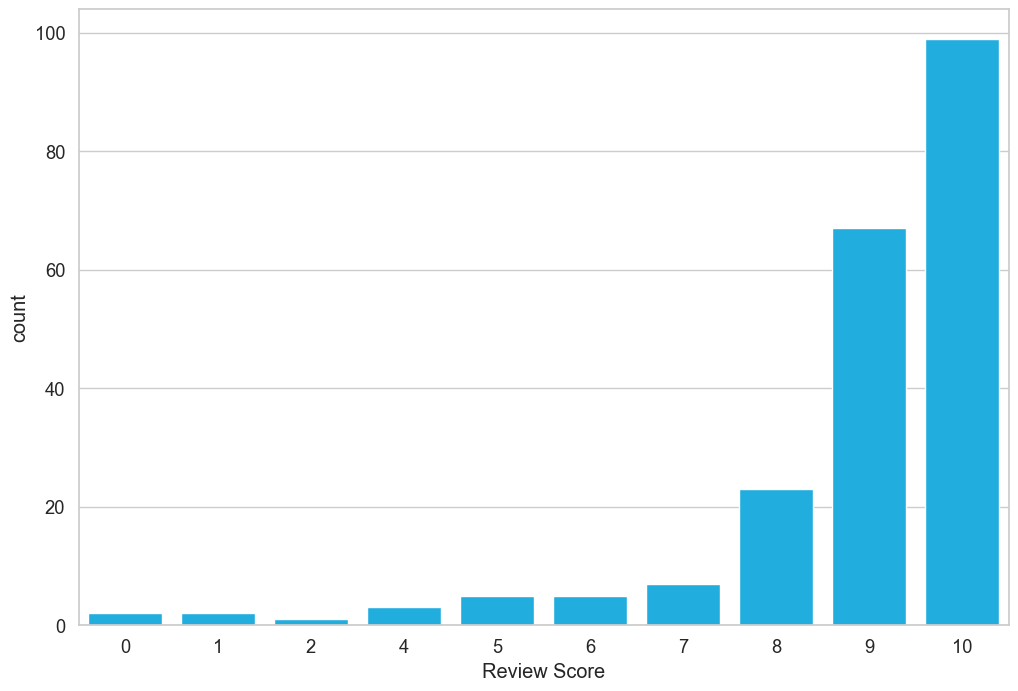

In [15]:
# look at the class balance
sns.countplot(df_NL, x="rating")
plt.xlabel("Review Score");

There are a lot more positive classes compared to negative classes. It doesn't seem like anyone gave this game a score of 3.

I'll define the rating scores as positive, negative, or neutral classes.
* Negative (Score: 0 - 4)
* Neutral (Score: 5)
* Positive (Score: 6 - 10)

In [16]:
def to_sentiment(rating):
    rating = int(rating)
    
    if rating <= 4:
        return 0
    elif rating == 5:
        return 1
    else:
        return 2
    
# apply scoring to dataset
df_NL["sentiment"] = df_NL["rating"].apply(to_sentiment)
df_NL

,name,date,rating,review,sentiment
0,Ughduty,"Jun 19, 2025",7,Never played the game. Metacritic assigned my ...,2
1,tarquinthegreat,"Apr 28, 2025",10,absolutely banging ‎xxxxxxxxxxxxxxxxxxxxxxxxxx...,2
2,Gamewing,"Apr 21, 2025",6,"First couple hours are fun, getting your first...",2
3,Z4ry,"Mar 24, 2025",9,100+ hours\n- Great evolution from previous ti...,2
4,Lucaq,"Mar 20, 2025",10,Perfect in every way.\nAaaaaaaaaaaaaaaaaaaaaaa...,2
...,...,...,...,...,...
209,Autosaver,"Jun 9, 2013",10,Animal Crossing has gone a long way since the ...,2
210,KirkyDaTurkey,"Jun 9, 2013",9,"Based on Day 1, this game is definitely a 9 so...",2
211,EFYevan,"Jun 9, 2013",10,Much different than the previous DS version I...,2
212,L0stR3negade,"Jun 9, 2013",9,Refreshing style of game to play. Its hard to ...,2


C:\Users\Philippa\AppData\Local\Temp\ipykernel_35816\3302368973.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names)


[Text(0, 0, 'negative'), Text(1, 0, 'neutral'), Text(2, 0, 'positive')]

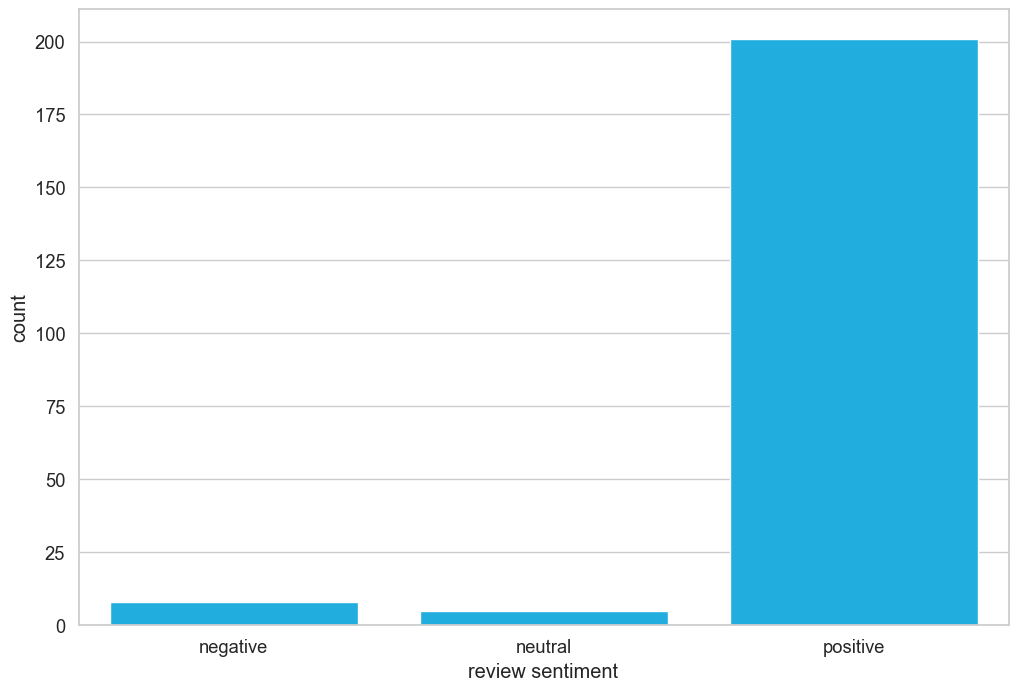

In [17]:
# plotting the distribution
class_names = ["negative", "neutral", "positive"]
ax = sns.countplot(df_NL, x="sentiment")
plt.xlabel("review sentiment")
ax.set_xticklabels(class_names)

### Data Preprocessing

In [18]:
# setting the model name
MODEL_NAME = "bert-base-cased"

# BERT-based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

In [19]:
## Common BERT tokens
print(tokenizer.sep_token, tokenizer.sep_token_id) # marker for ending of a sentence
print(tokenizer.cls_token, tokenizer.cls_token_id) # start of each sentence, so BERT knows it's classification
print(tokenizer.pad_token, tokenizer.pad_token_id) # special token for padding
print(tokenizer.unk_token, tokenizer.unk_token_id) # tokens not found in training set

[SEP] 102
[CLS] 101
[PAD] 0
[UNK] 100


In [20]:
# BERT works with fixed-length sequences. use a simple strategy to choose max length
# store length of each review
token_lens = []

# iterate through the content slide
for txt in df_NL["review"]:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Text(0.5, 16.044444444444423, 'Token count')

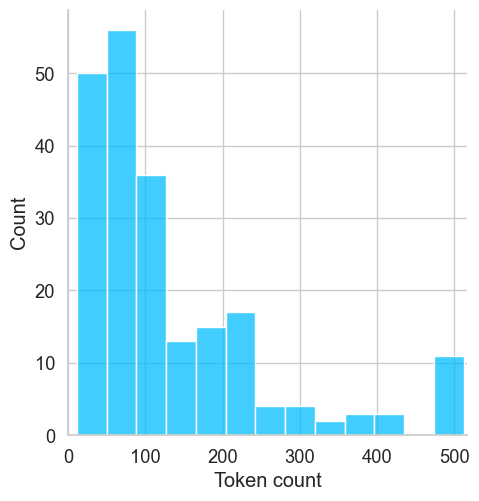

In [21]:
sns.displot(token_lens)
plt.xlim([0, 516]);
plt.xlabel("Token count")

Most of the reviews contain 200 tokens or less, but some contain up to 500. To be safe and encompass everything, the maximum length can be set to 512 (hard to tell on the graph if its less or more than 500).

In [22]:
MAX_LEN = 512

## Preparing Torch Dataset

In [23]:
class MCReviewDataset(Dataset):
    # Constructor Function
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    # Length magic method
    def __len__(self):
        return len(self.reviews)
    
    # Get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        
        # Encoded format to be returned
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors="pt"
        )
        
        return {
            "review_text": review,
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "targets": torch.tensor(target, dtype=torch.long)
        }

In [24]:
# create an 80% training data, 10% test data set, and 10% validation data set
df_train, df_test = train_test_split(df_NL, test_size=0.2, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

print(df_train.shape, df_val.shape, df_test.shape)

(171, 5) (21, 5) (22, 5)


In [25]:
# create a dataloader to release data in batches
def create_dataloader(df, tokenizer, max_len, batch_size):
    ds = MCReviewDataset(
        reviews=df["review"].to_numpy(),
        targets=df["sentiment"].to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )

In [26]:
# create train, test, and val DataLoaders
BATCH_SIZE = 16
train_dataloader = create_dataloader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_dataloader = create_dataloader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_dataloader = create_dataloader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [27]:
# Examples
data = next(iter(train_dataloader))
print(data.keys())

print(data["input_ids"].shape)
print(data["attention_mask"].shape)
print(data["targets"].shape)

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])
torch.Size([16, 512])
torch.Size([16, 512])
torch.Size([16])


## Sentiment Classification with BERT and Hugging Face

In [28]:
# Load in basic BERT model
bert_model = BertModel.from_pretrained(MODEL_NAME)

In [29]:
# sentiment classifier class
class SentimentClassifier(nn.Module):
    
    # Constructor class
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(MODEL_NAME)
        self.drop = nn.Dropout(p=0.3) # dropout layer for some regularization
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
        
    # forward propagation class
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
        input_ids=input_ids,
        attention_mask=attention_mask
        )
        pooled_output = outputs.pooler_output   
        output = self.drop(pooled_output)
        return self.out(output)

In [30]:
# instatiate the model and move to classifier
model = SentimentClassifier(len(class_names)).to(device)
model

SentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, eleme

In [31]:
## model characteristics
print(bert_model.config.hidden_size)

768


### Training Phase

In [32]:
EPOCHS = 10

# optimizer Adam
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

total_steps = len(train_dataloader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# set the loss function
loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
# function for a single training iteration

def train_step(model: torch.nn.Module,
                data_loader,
                loss_fn,
                optimizer,
                device,
                scheduler,
                n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0
    
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        
        loss.backward()
        
        ## gradient descent
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        
    return correct_predictions.double() / n_examples, np.mean(losses)

In [34]:
# function to evaluate model performance
def eval_model(model,
               data_loader,
               loss_fn,
               device,
               n_examples):
    
    model = model.eval()
    
    losses = []
    correct_predictions = 0
    
    with torch.inference_mode():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            # get model outputs
            outputs = model(
                input_ids = input_ids,
                attention_mask=attention_mask
            )
            
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
            
    return correct_predictions.double() / n_examples, np.mean(losses)

In [35]:
from tqdm import tqdm

history = defaultdict(list)
best_accuracy = 0

for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch {epoch + 1} / {EPOCHS}")
    print("-" * 10)
    
    train_acc, train_loss = train_epoch(
        model,
        train_dataloader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )
    
    print(f"Train loss: {train_loss} | Accuracy: {train_acc}")
    
    # model performance (acc and loss)
    val_acc, val_loss = eval_model(
        model,
        val_dataloader,
        loss_fn,
        device,
        len(df_val)
    )
    
    print(f"Val loss: {val_loss} | Val acc: {val_acc}")
    print()
    
    history["train_acc"].append(train_acc)
    history["train_loss"].append(train_loss)
    history["val_acc"].append(val_acc)
    history["val_loss"].append(val_loss)
    
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), "best_model_state.bin")
        best_accuracy = val_acc

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1 / 10
----------
Train loss: 0.4626821477643468 | Accuracy: 0.9239766081871345
Val loss: 0.15848623868077993 | Val acc: 0.9523809523809523



 10%|█         | 1/10 [00:10<01:34, 10.53s/it]

Epoch 2 / 10
----------
Train loss: 0.3331422462890094 | Accuracy: 0.935672514619883


 20%|██        | 2/10 [00:21<01:25, 10.63s/it]

Val loss: 0.1680564433336258 | Val acc: 0.9523809523809523

Epoch 3 / 10
----------
Train loss: 0.30327355150472035 | Accuracy: 0.935672514619883


 30%|███       | 3/10 [00:32<01:16, 10.99s/it]

Val loss: 0.15246130246669054 | Val acc: 0.9523809523809523

Epoch 4 / 10
----------
Train loss: 0.3113393004645001 | Accuracy: 0.935672514619883


 40%|████      | 4/10 [00:42<01:04, 10.70s/it]

Val loss: 0.14908415637910366 | Val acc: 0.9523809523809523

Epoch 5 / 10
----------
Train loss: 0.3102476955814795 | Accuracy: 0.935672514619883


 50%|█████     | 5/10 [00:53<00:52, 10.53s/it]

Val loss: 0.14843028225004673 | Val acc: 0.9523809523809523

Epoch 6 / 10
----------
Train loss: 0.29771325026046147 | Accuracy: 0.935672514619883


 60%|██████    | 6/10 [01:03<00:42, 10.52s/it]

Val loss: 0.14909441582858562 | Val acc: 0.9523809523809523

Epoch 7 / 10
----------
Train loss: 0.3011466061527079 | Accuracy: 0.935672514619883


 70%|███████   | 7/10 [01:14<00:31, 10.62s/it]

Val loss: 0.14926902949810028 | Val acc: 0.9523809523809523

Epoch 8 / 10
----------
Train loss: 0.2961908280849457 | Accuracy: 0.935672514619883


 80%|████████  | 8/10 [01:24<00:21, 10.58s/it]

Val loss: 0.1494115423411131 | Val acc: 0.9523809523809523

Epoch 9 / 10
----------
Train loss: 0.29725629396059294 | Accuracy: 0.935672514619883


 90%|█████████ | 9/10 [01:35<00:10, 10.58s/it]

Val loss: 0.14938406832516193 | Val acc: 0.9523809523809523

Epoch 10 / 10
----------
Train loss: 0.3001482913439924 | Accuracy: 0.935672514619883


100%|██████████| 10/10 [01:45<00:00, 10.58s/it]

Val loss: 0.14931335113942623 | Val acc: 0.9523809523809523



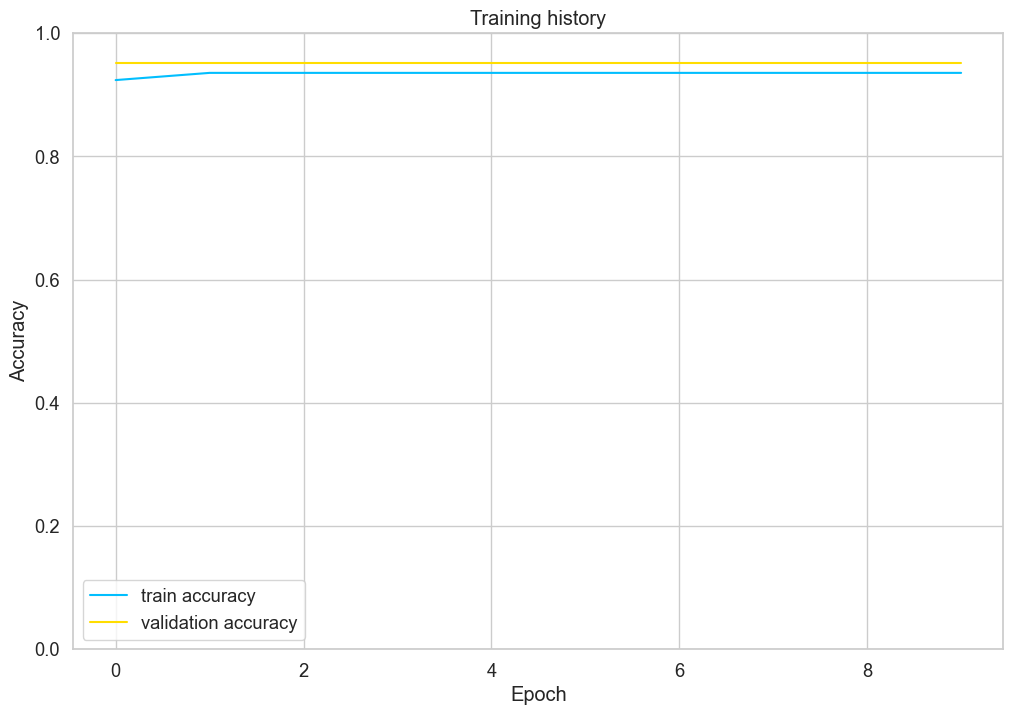

In [39]:
# Plot training and validation accuracy
plt.plot(
    [acc.detach().cpu().item() for acc in history["train_acc"]],
    label='train accuracy'
    )
plt.plot(
    [acc.detach().cpu().item() for acc in history["val_acc"]],
    label='validation accuracy'
    )

# Graph chars
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [42]:
test_acc, _ = eval_model(
  model,
  test_dataloader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.9545454545454546